In [1]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, when

# Initialize Spark Session
spark = SparkSession.builder.appName("FinancialDataETL").getOrCreate()

# Read data
df = spark.read.csv("fintech_sample.csv", header=True, inferSchema=True)

# Data Cleaning: Remove nulls
cleaned_df = df.dropna()

# Feature Engineering: Debt to Income Ratio
cleaned_df = cleaned_df.withColumn(
    "debt_to_income",
    col("current_debt") / col("income")
)

# Risk Scoring (simple rule: high debt_to_income = high risk)
risk_df = cleaned_df.withColumn(
    "risk_score",
    when(col("debt_to_income") > 0.25, "HIGH")
    .when(col("debt_to_income") > 0.10, "MEDIUM")
    .otherwise("LOW")
)

# Save cleaned data & risk scores to output
cleaned_df.toPandas().to_csv("cleaned_data.csv", index=False)
risk_df.select("id", "risk_score").toPandas().to_csv("risk_scores.csv", index=False)

spark.stop()


             id        age         income   loan_amount  current_debt  \
count  50.00000  50.000000      50.000000     50.000000     50.000000   
mean   25.50000  41.260000   73088.000000  15974.000000   6841.000000   
std    14.57738   9.501471   16519.297806   7989.937805   5698.242568   
min     1.00000  26.000000   42000.000000   5000.000000      0.000000   
25%    13.25000  33.250000   59625.000000   9225.000000   2000.000000   
50%    25.50000  41.000000   74250.000000  14000.000000   4950.000000   
75%    37.75000  49.000000   86750.000000  21750.000000   9862.500000   
max    50.00000  59.000000  105000.000000  35000.000000  20000.000000   

       defaulted  debt_to_income  
count  50.000000       50.000000  
mean    0.380000        0.084275  
std     0.490314        0.061006  
min     0.000000        0.000000  
25%     0.000000        0.031955  
50%     0.000000        0.073409  
75%     1.000000        0.125815  
max     1.000000        0.224852  


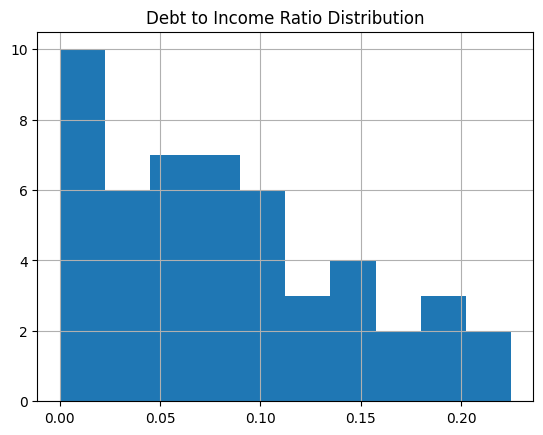

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('cleaned_data.csv')
print(df.describe())
df['debt_to_income'].hist()
plt.title('Debt to Income Ratio Distribution')
plt.show()
